## "Housing Insecurity DataDive:  Below are results to Volunteer Signup Sheet Rows 3 & 4"

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in processed data
nyc_ts_processed = pd.read_csv("../../data/processed/nyc_processed_timeseries_2017_to_2019_20210225.csv")

### (NYC) How many total evictions were there in 2017?, 2018?, 2019?

In [5]:
# Function returns Total evictions by year

def total_evictions(df, begin, end, year):
    df_year = df[(df["month"] > begin) & (df["month"] < end)]
    print("The year", year, "saw ", df_year["total-eviction-filings"].sum(),"evictions in NYC")
    return df_year["total-eviction-filings"].sum()

In [7]:
no_2017 = total_evictions(nyc_ts_processed, "2016-12", "2018-01", 2017)
no_2018 = total_evictions(nyc_ts_processed, "2017-12", "2019-01", 2018)
no_2019 = total_evictions(nyc_ts_processed, "2018-12", "2020-01", 2019)

The year 2017 saw  20789 evictions in NYC
The year 2018 saw  19988 evictions in NYC
The year 2019 saw  16975 evictions in NYC


### What was the percent change year over year?

In [9]:
# Calcualte percent change over years 2017-18 and 2018-19

change_2018 = 100*((no_2018-no_2017)/no_2017)
change_2019 = 100*((no_2019-no_2018)/no_2018)
print("Percent change from 2017 to 2018 was ", change_2018)
print("Percent change from 2018 to 2019 was ", change_2019)

Percent change from 2017 to 2018 was  -3.852999182259849
Percent change from 2018 to 2019 was  -15.074044426655995


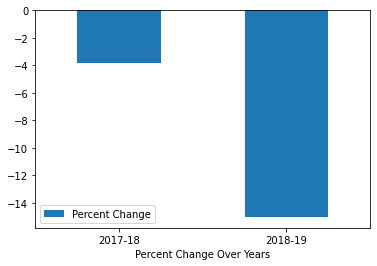

In [10]:
# Plot of the eviction rate drop

df = pd.DataFrame({'Percent Change Over Years':["2017-18", "2018-19"], 'Percent Change':[change_2018, change_2019]})
ax = df.plot.bar(x='Percent Change Over Years', y='Percent Change', rot=0)

### (NYC) What is the overall eviction rate for this time period (i.e., evictions/renting households)?

In [11]:
# Read in the eviction data

nyc_processed = pd.read_csv('../../data/processed/nyc_processed_2017_to_2019_20210225.csv')

In [12]:
# Calculates the overall eviction rate for 2017-19

print("The overall eviction rate from Jan 2017 through Dec 2019 was", 100 *( (no_2017+no_2018+no_2019)/(nyc_processed['total-renter-occupied-households'].sum()) ))

The overall eviction rate from Jan 2017 through Dec 2019 was 2.713904673111517


### Yearly comparison of Total Evictions by month

In [131]:
# Read in and prep the dataframe for plot

nyc_ts_processed = pd.read_csv("../../data/processed/nyc_processed_timeseries_2017_to_2019_20210225.csv")

nyc_ts_processed["year"] = 0      #add column to df
df = nyc_ts_processed             #name change for ease of use

# Fill 'year' column
df.loc[df['month'] < '2018-01', 'year'] = 2017
df.loc[(df['month'] < '2019-01') & (df['month'] > '2017-12'), 'year'] = 2018
df.loc[(df['month'] < '2020-01') & (df['month'] > '2018-12'), 'year'] = 2019

### Plot of overall evictions:  Each year by monthly eviction totals

<AxesSubplot:xlabel='month', ylabel='total-eviction-filings'>

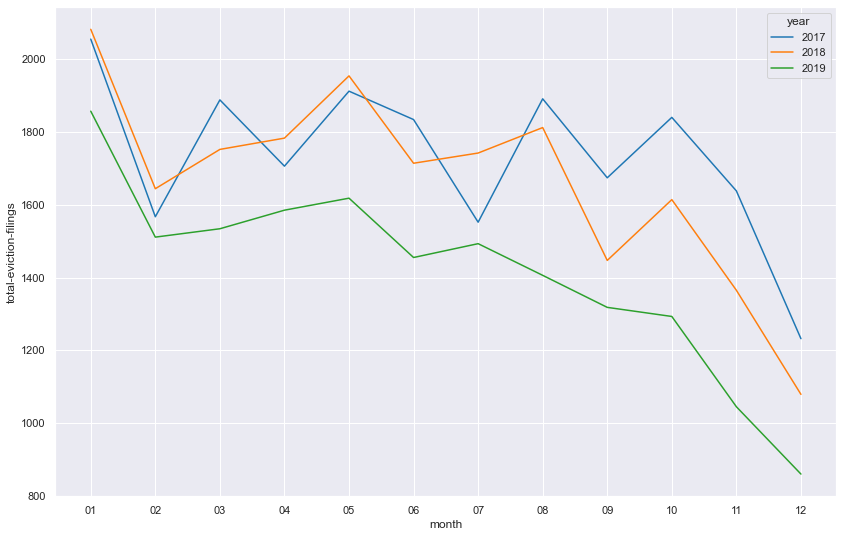

In [137]:
# Plot Years by monthly eviction rates
sns.set(rc={'figure.figsize':(14,9)})
sns.lineplot(data=df, x= df['month'].str[-2:], y="total-eviction-filings", hue = "year", palette='tab10')